In [1]:
from math import tan, atan2

import matplotlib.animation as manimation
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Circle, Wedge, Polygon
from metpy.plots import add_metpy_logo, StationPlot
from metpy.plots.wx_symbols import current_weather, wx_code_map
import numpy as np

plt.rcParams['animation.html'] = 'jshtml'

%matplotlib inline

In [2]:
# If you don't see the 'imagemagick' writer listed here,
# install imagemagick (brew command included) and restart
# the kernel.
print(manimation.writers.avail)
#!brew install imagemagick

{'ffmpeg': <class 'matplotlib.animation.FFMpegWriter'>, 'ffmpeg_file': <class 'matplotlib.animation.FFMpegFileWriter'>, 'imagemagick': <class 'matplotlib.animation.ImageMagickWriter'>, 'imagemagick_file': <class 'matplotlib.animation.ImageMagickFileWriter'>, 'html': <class 'matplotlib.animation.HTMLWriter'>}


In [3]:
def get_x_bounds(y):
    """Returns the x bound for ornaments in the tree for a given y position."""
    tree_width = 18
    tree_height = 25
    theta = atan2(tree_width/2, tree_height)
    bound = (tree_height - y) * tan(theta)
    return bound

In [4]:
def create_ornaments(n_ornaments, color='k'):
    """Create ornaments and return the artist."""
    ornaments_y = np.random.triangular(3, 3.5, 24.5, n_ornaments)
    bounds = get_x_bounds(ornaments_y)
    ornaments_x = np.random.rand(n_ornaments) * 2 * bounds - bounds
    stationplot = StationPlot(ax, ornaments_x, ornaments_y, clip_on=True, fontsize=24)
    symbols = np.array(list(wx_code_map.values()))
    wx = symbols[np.random.randint(0, 102, n_ornaments)]
    return stationplot.plot_symbol('C', wx, current_weather, color=color)
    

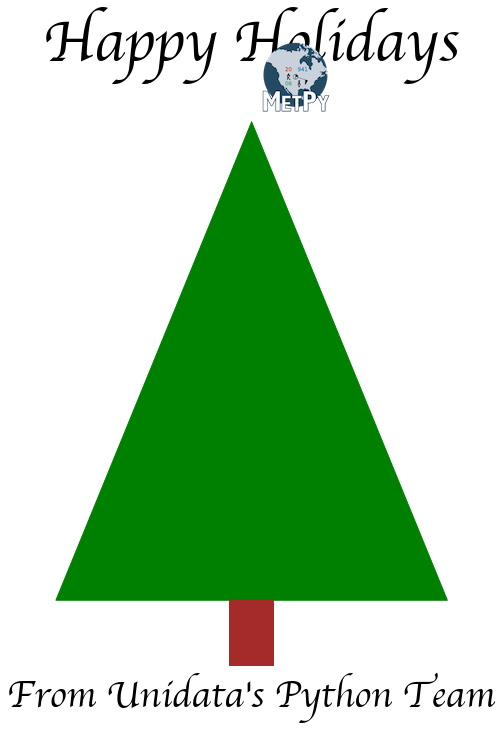

In [5]:
# Tree and ornament parameters
n_ornaments = 30

trunk_coords = np.array([[-1, 1, 1, -1],
                         [0, 0, 3, 3]])

tree_coords = np.array([[-9, 9, 0],
                        [3, 3, 25]])

artists = []

# Create the polygons for the tree and trunk
trunk = Polygon(trunk_coords.T, True)
tree = Polygon(tree_coords.T, True)

fig, ax = plt.subplots(figsize=(8, 12))

# Add the tree and trunk patches
p = PatchCollection([tree], color='green')
ax.add_collection(p)

p = PatchCollection([trunk], color='brown')
ax.add_collection(p)

# Add a tree topper
add_metpy_logo(fig, 258, 615, size='small', zorder=1)

# Create all of the artists
for i in range(20):
    artists.append([create_ornaments(n_ornaments, color='y'),
                   create_ornaments(n_ornaments, color='tab:red'),
                   create_ornaments(n_ornaments, color='cyan')])

# Add greeting text
plt.text(0.5, 0.95,'Happy Holidays', horizontalalignment='center',
         verticalalignment='center', transform=ax.transAxes,
         family='cursive', fontsize=60)

plt.text(0.5, -0.05,'From Unidata\'s Python Team', horizontalalignment='center',
         verticalalignment='center', transform=ax.transAxes,
         family='cursive', fontsize=38)

# Cleanup the axis
ax.set_xlim(-10, 10)
ax.set_ylim(0, 30)
ax.set_aspect('equal')
ax.axis('off')

# Do the animation
anim = manimation.ArtistAnimation(fig, artists, interval=500)
anim.save('tree.gif', writer='imagemagick')
anim